<a href="https://colab.research.google.com/github/Ishan1Pant/Object_detection_FasterRCNN/blob/main/object_detection_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
model2=hub.load("https://www.kaggle.com/models/google/faster-rcnn-inception-resnet-v2/tensorFlow1/faster-rcnn-openimages-v4-inception-resnet-v2/1?tfhub-redirect=true")

In [ ]:
import random
import math

In [ ]:
color_codes={}

In [ ]:
image_path = 'test_image_car.jpg'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_resized = cv2.resize(image_rgb, (640, 640))
converted_img = tf.image.convert_image_dtype(image_resized,tf.float32)[tf.newaxis, ...]


In [ ]:
print(model2.signatures)

_SignatureMap({'default': <ConcreteFunction () -> Dict[['detection_class_labels', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None)], ['detection_boxes', TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)], ['detection_scores', TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)], ['detection_class_names', TensorSpec(shape=(None, 1), dtype=tf.string, name=None)], ['detection_class_entities', TensorSpec(shape=(None, 1), dtype=tf.string, name=None)]] at 0x7A678FD0CC70>})


In [ ]:
output=model2.signatures['default'](converted_img)

# Output will contain boxes, classes, scores, etc.
boxes = output['detection_boxes']
scores = output['detection_scores']
classes = output['detection_class_entities']

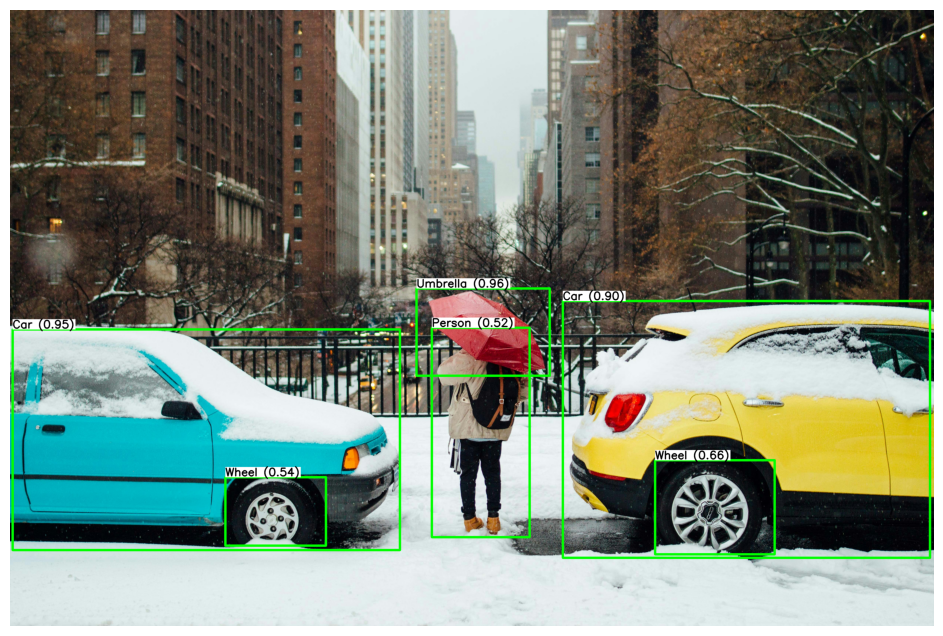

In [ ]:
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

for i in range(len(boxes)):
    if scores[i] > 0.5:
        box = boxes[i]
        y_min, x_min, y_max, x_max = box

        start_point = (int(x_min * image_bgr.shape[1]), int(y_min * image_bgr.shape[0]))
        end_point = (int(x_max * image_bgr.shape[1]), int(y_max * image_bgr.shape[0]))

        cv2.rectangle(image_bgr, start_point, end_point, (0, 255, 0), 12)

        label = f'{classes[i].numpy().decode("utf-8")} ({scores[i]:.2f})'
        label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 2, 6)
        label_ymin = max(start_point[1], label_size[1] + 10)
        cv2.rectangle(image_bgr, (start_point[0], label_ymin - label_size[1] - 10),
                      (start_point[0] + label_size[0], label_ymin), (255, 255, 255), cv2.FILLED)
        cv2.putText(image_bgr, label, (start_point[0], label_ymin - 7),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 6)

output_image_path = 'output_image.jpg'
cv2.imwrite(output_image_path, image_bgr)

img = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()